<a href="https://colab.research.google.com/github/amandeep25/Topic_modelling/blob/main/Topic_modelling_20newsgrp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
!pip install pyLDAvis

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [6]:
import re
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# pd.set_option('display.max_colwidth', -1)

# dataset
from sklearn.datasets import fetch_20newsgroups

# Gensim packages
# strip tags for removing HTML tags
from gensim.parsing import strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords
from gensim.parsing import preprocess_string

In [7]:
news_group = fetch_20newsgroups(subset='train')
news_group_data = news_group.data
news_group_target_names = news_group.target_names
news_group_target = news_group.target

In [8]:
news_df = pd.DataFrame({'news': news_group_data,
                        'class': news_group_target})

In [9]:
news_df

,news,class
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1


In [10]:
# Custom filter method
transform_to_lower = lambda s: s.lower()

remove_single_char = lambda s: re.sub(r'\s+\w{1}\s+', '', s)

# Filters to be executed in pipeline
CLEAN_FILTERS = [strip_tags,
                strip_numeric,
                strip_punctuation,
                strip_multiple_whitespaces,
                transform_to_lower,
                remove_stopwords,
                remove_single_char]

# Method does the filtering of all the unrelevant text elements
def cleaning_pipe(document):
    # Invoking gensim.parsing.preprocess_string method with set of filters
    processed_words = preprocess_string(document, CLEAN_FILTERS)

    return processed_words

In [11]:
news_df['clean_text'] = news_df['news'].apply(cleaning_pipe)

In [12]:
news_df['clean_text']

0        [lerxst, wam, umd, eduthing, subject, car, nnt...
1        [guykuo, carsonwashington, edu, guy, kuo, subj...
2        [twillis, ec, ecn, purdue, edu, thomaswillis, ...
3        [jgreen, amber, joe, green, subject, weitekorg...
4        [jcm, head, cfa, harvard, edu, jonathan, mcdow...
                               ...                        
11309    [jim, zisfein, factory, com, jim, zisfein, sub...
11310    [ebodin, pearl, tufts, edu, subject, screen, d...
11311    [westes, netcom, com, estes, subject, mounting...
11312    [steve, hcrlgw, steven, collins, subject, sphe...
11313    [gunning, cco, caltech, edu, kevingunning, sub...
Name: clean_text, Length: 11314, dtype: object

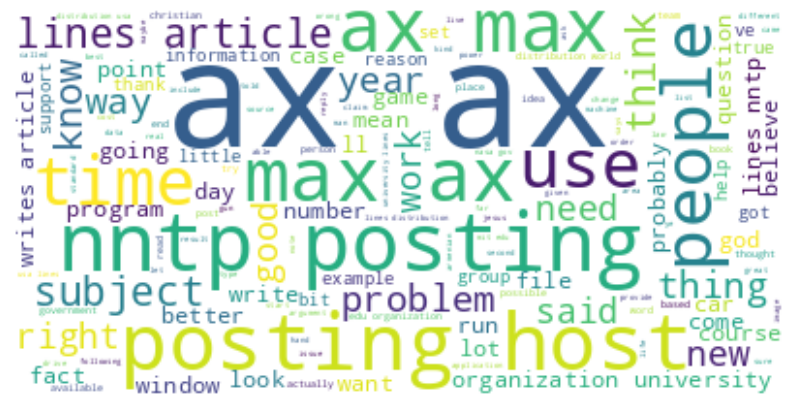

In [13]:
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert lists to strings in the 'clean_text' column
news_df['clean_text'] = news_df['clean_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Join the different processed titles together.
long_string = ','.join(list(news_df['clean_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [15]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','ax'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = news_df.clean_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

#first 30 words in the 1st documnet
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lerxst', 'wam', 'umd', 'eduthing', 'car', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'organization', 'university', 'maryland', 'college', 'park', 'lines', 'wondering', 'enlighten', 'car', 'saw', 'day', 'door', 'sports', 'car', 'looked', 'lateearlycalled', 'bricklin', 'doors', 'small']


In [16]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [17]:
from pprint import pprint

# number of topics
num_topics = 20


# The LdaMulticore class is a parallelized version of the LDA model that utilizes multiple CPU cores for faster training.
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"writes" + 0.009*"god" + 0.008*"article" + 0.006*"organization" + '
  '0.006*"lines" + 0.006*"people" + 0.006*"com" + 0.005*"like" + 0.004*"know" '
  '+ 0.004*"university"'),
 (1,
  '0.045*"max" + 0.007*"lines" + 0.007*"organization" + 0.004*"com" + '
  '0.004*"posting" + 0.004*"gv" + 0.004*"writes" + 0.003*"team" + 0.003*"cx" + '
  '0.003*"host"'),
 (2,
  '0.008*"people" + 0.006*"gun" + 0.004*"state" + 0.004*"lines" + 0.004*"like" '
  '+ 0.004*"com" + 0.003*"right" + 0.003*"organization" + 0.003*"law" + '
  '0.003*"article"'),
 (3,
  '0.010*"lines" + 0.009*"organization" + 0.006*"university" + 0.005*"new" + '
  '0.005*"com" + 0.005*"ripem" + 0.005*"writes" + 0.004*"cs" + 0.004*"ca" + '
  '0.003*"time"'),
 (4,
  '0.005*"lines" + 0.004*"com" + 0.004*"writes" + 0.004*"like" + 0.003*"ca" + '
  '0.003*"canon" + 0.003*"article" + 0.003*"organization" + 0.003*"jews" + '
  '0.003*"people"'),
 (5,
  '0.009*"com" + 0.008*"organization" + 0.007*"lines" + 0.006*"writes" + '
  '0.005

In [18]:

#In the context of topic modeling, lower perplexity values indicate better performance. A lower perplexity suggests that the model is better at predicting the words in the corpus.
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


#Coherence is a measure of the interpretability and meaningfulness of the topics generated by the model. Higher coherence scores indicate more coherent and interpretable topics.
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -10.887416759652481

Coherence Score:  0.5165636665466833


In [ ]:
import os

In [ ]:
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import pyLDAvis.gensim

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('/content/drive/MyDrive/Topic_modelling/ldavis_prepared_'+str(num_topics))

# # time consuming - make the if statement True

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False, mds='mmds', R=30)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034003  0.126777       1        1   1.835397
1      0.038660 -0.128673       2        1   8.345735
2      0.046066  0.047098       3        1   3.004833
3      0.062444  0.000027       4        1   3.756250
4     -0.020769  0.121937       5        1   1.626182
5     -0.157506  0.059354       6        1   0.343551
6     -0.069101  0.069177       7        1   1.509190
7     -0.044497 -0.078729       8        1   1.740620
8      0.092103  0.110521       9        1   2.725540
9     -0.097581 -0.070676      10        1   2.959846
10     0.009038 -0.102285      11        1   8.436652
11     0.100638  0.023277      12        1   3.191019
12     0.007805 -0.001937      13        1   5.225102
13     0.107053 -0.117771      14        1   8.495865
14     0.120818 -0.029471      15        1  14.176879
15     0.139304  0.043344      16        1   8.230481
16    -0.028019  0.038721      17        1   2.303839
17     0.070494 -0.060076      18        1  10.526632
18    -0.402649 -0.011493      19        1   5.395846
19    -0.008303 -0.039124      20        1   6.170540, topic_info=              Term          Freq         Total Category  logprob  loglift
7213            ax  56766.000000  56766.000000  Default  30.0000  30.0000
2992           max   4377.000000   4377.000000  Default  29.0000  29.0000
29    organization  10771.000000  10771.000000  Default  28.0000  28.0000
22           lines  11465.000000  11465.000000  Default  27.0000  27.0000
204            com   9950.000000   9950.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
555          state    168.439559   2358.744922  Topic20  -6.3894   0.1461
2992           max    188.295141   4377.249353  Topic20  -6.2779  -0.3608
859            way    172.342680   2857.933138  Topic20  -6.3665  -0.0230
386          point    154.842696   1746.173756  Topic20  -6.4735   0.3626
378           need    157.162808   2345.387445  Topic20  -6.4587   0.0825

[1728 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
15307     13  0.856886       aamir
15307     20  0.061206       aamir
58988      8  0.588607  ablecolors
1231       1  0.013717          ac
1231       2  0.058299          ac
...      ...       ...         ...
17768     15  0.034886     zionism
17768     16  0.680277     zionism
17768     18  0.008721     zionism
17768     20  0.226759     zionism
6676       9  0.919430        zmed

[8719 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### Finding number of topics

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts= data_words, start=2, limit=40, step=6)

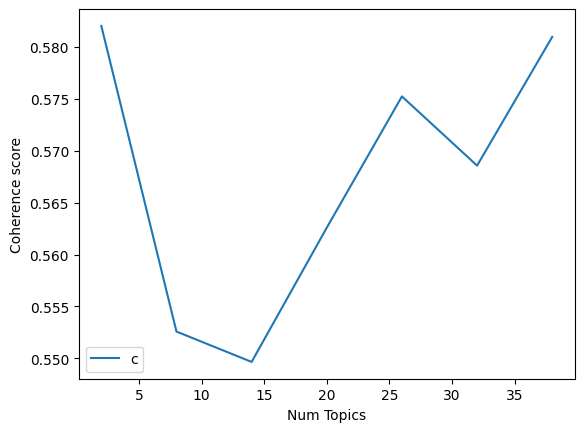

In [ ]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.582
Num Topics = 8  has Coherence Value of 0.5526
Num Topics = 14  has Coherence Value of 0.5497
Num Topics = 20  has Coherence Value of 0.5626
Num Topics = 26  has Coherence Value of 0.5752
Num Topics = 32  has Coherence Value of 0.5686
Num Topics = 38  has Coherence Value of 0.581


In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts= data_words, start=2, limit=100, step=6)

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5778
Num Topics = 8  has Coherence Value of 0.5295
Num Topics = 14  has Coherence Value of 0.5562
Num Topics = 20  has Coherence Value of 0.5395
Num Topics = 26  has Coherence Value of 0.5726
Num Topics = 32  has Coherence Value of 0.5684
Num Topics = 38  has Coherence Value of 0.5567
Num Topics = 44  has Coherence Value of 0.5527
Num Topics = 50  has Coherence Value of 0.547
Num Topics = 56  has Coherence Value of 0.5442
Num Topics = 62  has Coherence Value of 0.5398
Num Topics = 68  has Coherence Value of 0.5361
Num Topics = 74  has Coherence Value of 0.5216
Num Topics = 80  has Coherence Value of 0.5282
Num Topics = 86  has Coherence Value of 0.5197
Num Topics = 92  has Coherence Value of 0.5231
Num Topics = 98  has Coherence Value of 0.5071


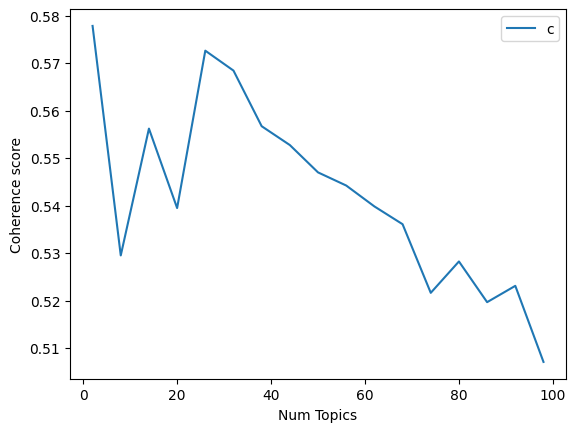

In [ ]:
# Show graph
limit=100; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Extras

In [ ]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(12,
  '0.019*"ax" + 0.008*"organization" + 0.007*"lines" + 0.004*"com" + '
  '0.004*"writes" + 0.004*"host" + 0.004*"article" + 0.003*"posting" + '
  '0.003*"university" + 0.003*"know"'),
 (29,
  '0.006*"lines" + 0.005*"organization" + 0.005*"game" + 0.005*"team" + '
  '0.005*"writes" + 0.005*"com" + 0.004*"hockey" + 0.004*"university" + '
  '0.004*"article" + 0.004*"time"'),
 (24,
  '0.005*"cx" + 0.005*"scx" + 0.004*"applicant" + 0.004*"lines" + '
  '0.004*"organization" + 0.003*"hiv" + 0.003*"space" + 0.003*"kan" + '
  '0.002*"university" + 0.002*"cs"'),
 (23,
  '0.010*"lines" + 0.008*"organization" + 0.007*"com" + 0.006*"ax" + '
  '0.005*"posting" + 0.005*"windows" + 0.005*"nntp" + 0.005*"like" + '
  '0.005*"host" + 0.005*"article"'),
 (25,
  '0.013*"com" + 0.012*"lines" + 0.010*"organization" + 0.007*"writes" + '
  '0.006*"article" + 0.005*"posting" + 0.005*"host" + 0.005*"nntp" + '
  '0.005*"university" + 0.004*"ca"'),
 (16,
  '0.651*"ax" + 0.047*"max" + 0.004*"gv" + 0.003*"bhj"

In [ ]:
import pandas as pd

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_data = []

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_data.append([int(topic_num), round(prop_topic, 4), topic_keywords, texts[i]])

    # Create DataFrame
    columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Text']
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=columns)

    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Show
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.head(10)



,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10,0.2712,"com, lines, organization, writes, article, peo...",lerxst wam umd eduthing subject car nntp posti...
1,1,13,0.5076,"organization, lines, com, university, article,...",guykuo carsonwashington edu guy kuo subject si...
2,2,25,0.4195,"com, lines, organization, writes, article, pos...",twillis ec ecn purdue edu thomaswillis subject...
3,3,25,0.9859,"com, lines, organization, writes, article, pos...",jgreen amber joe green subject weitekorganizat...
4,4,31,0.6186,"people, writes, lines, organization, god, arti...",jcm head cfa harvard edu jonathan mcdowell sub...
5,5,14,0.6805,"ax, lines, organization, com, university, like...",dfo vttoulu tko vtt fi foxvog douglas subject ...
6,6,5,0.7172,"lines, organization, com, writes, article, new...",bmdelane quads uchicago edu brian manning dela...
7,7,22,0.9065,"scsi, dos, bit, lines, mac, software, organiza...",bgrubb dante nmsu edu grubb subject ide vs scs...
8,8,5,0.4380,"lines, organization, com, writes, article, new...",holmes iscsvax uni edu subject win icon help o...
9,9,5,0.5248,"lines, organization, com, writes, article, new...",kerr ux cso uiuc edu stan kerr subject sigma d...


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0,0.9916,"god, organization, lines, com, article, postin...",csmcd brunel ac uk michaeldavis subject help o...
1,1,0.9925,"com, lines, organization, writes, host, like, ...",awds uhura cc rochester edu adam edwards subje...
2,2,0.9907,"com, lines, organization, article, writes, lik...",davidj rahul net david josephson subject micro...
3,3,0.9933,"organization, lines, hockey, new, writes, univ...",xlee gw wmich edu subject msg sensitivity supe...
4,4,0.9979,"scsi, com, lines, organization, drive, ide, ti...",bgrubb dante nmsu edu grubb subject ide vs scs...


In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,26,"lines, organization, writes, university, card,...",317.0,0.0280
1,14,"com, organization, lines, writes, article, lik...",380.0,0.0336
2,29,"organization, lines, com, posting, writes, uni...",256.0,0.0226
3,9,"organization, lines, university, posting, arti...",348.0,0.0308
4,13,"lines, organization, com, writes, article, win...",463.0,0.0409
...,...,...,...,...
11309,1,"com, lines, organization, writes, host, like, ...",NaN,NaN
11310,9,"organization, lines, university, posting, arti...",NaN,NaN
11311,37,"com, lines, organization, writes, article, uni...",NaN,NaN
11312,29,"organization, lines, com, posting, writes, uni...",NaN,NaN


# **Bertopic**


In [ ]:
!pip install bertopic
!pip install datasets
!pip install openai

In [19]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(news_df['clean_text'], show_progress_bar=True)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/354 [00:00<?, ?it/s]

KeyboardInterrupt: ignored